# Work plan:

Before we dive deep in the work plan details, let's mention our main goal for the 
analysis:

Interconnect is phone service provider that wants to predict its customer churn rate. Correctly identifying customers with high cancellation probabilities will help the company create offers to keep customers.

# Interconnect 
In order to solve the requested task, we must begin by understanding it.

**Client:** Interconnect, phone provider

**Area:** Marketing (Customer retention)

**Relevant metric(s):** Customer churn rate

**Goal:** Predict the churn rate of users using the prediction of churn probability for each user

**Context:** Interconnect's marketing team would like to decrease customer churn rate by offering special benefits to those clients more likely to cancel their contracts.

**Proposed solution:**
A general data analysis will be performed to solve this task, the following are the main stages:

**1. Data Collection** 
Our data will come from several files:

* **Identify Data Sources:** Our data has been gathered by marketing team, 
* **Data Acquisition:** Done

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

**2. Data Preparation**

* **Data Cleaning:** 
    * **Handle missing values:** Impute missing values (e.g., mean, median, mode imputation), remove rows/columns with missing values, or use more sophisticated techniques.
    * **Handle outliers:** Identify and address outliers (e.g., removal, transformation).
    * **Data type conversion:** Convert data types (e.g., strings to numbers, dates to datetime objects).
    * **Format and consistency:** Ensure data is in a consistent format (e.g., date/time formats, units).
* **Data Transformation:** 
    * **Feature engineering:** Create new features from existing ones (e.g., creating new columns based on existing ones, binning numerical variables).
    * **Data scaling/normalization:** Scale or normalize features (e.g., standardization, min-max scaling) to improve model performance.
    * **Data encoding:** Convert categorical variables into numerical representations (e.g., one-hot encoding, label encoding).
* **Data Integration:** Combine data from multiple sources if necessary.

**3. Exploratory Data Analysis (EDA)**

* **Summary statistics:** Calculate descriptive statistics (mean, median, standard deviation, quartiles, etc.) to understand data distribution.
* **Data visualization:** Create plots (histograms, scatter plots, box plots, etc.) to visualize data distributions, identify patterns, and spot anomalies.
* **Univariate and bivariate analysis:** Explore relationships between individual variables and between pairs of variables.
* **Identify potential issues:** Detect outliers, missing values, and inconsistencies.

**4. Data Modeling**

* **Binary classification models:** We will use two main models including Logistic Regression and XGBoost, more models will be implemented in the future.
* **Model training and tuning:** We will search for optimal hyperparameters combined with cross validation.
* **Model evaluation:** Our model will we evaluated using ROC-AUC score.

## 1. Data collection: 
The marketing team has provided the available data to develop our analysis. Let's import our data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
contract_df = pd.read_csv('./datasets/contract.csv')
personal_df = pd.read_csv('./datasets/personal.csv')
internet_df = pd.read_csv('./datasets/internet.csv')
phone_df = pd.read_csv('./datasets/phone.csv')

## 2. Data preparation

In [3]:
contract_df.info()
contract_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_ID        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customer_ID,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
personal_df.info()
personal_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_ID     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customer_ID,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
phone_df.info()
phone_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_ID     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customer_ID,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [6]:
internet_df.info()
internet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_ID        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customer_ID,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Based on the previously obtained basic information we will start by performing the following data type conversions:

- `contract_df`:
  - `begin_date`: object to datetime
  - `end_date`: object to datetime
  - `paperless_billing`: object to bool
  - `total_charges`: object to float 
- `personal_df`:
  - `gender`: object to bool
  - `senior_citizen`: int64 to bool 
  - `partner` : object to bool
  - `dependents`: object to bool
- `internet_df`:
  - `internet_service`: object to bool (fiber?)
  - `online_security`: object to bool
  - `online_backup`: object to bool
  - `device_protection`: object to bool
  - `tech_support`: object to bool
  - `streaming_TV`: object to bool
  - `streaming_movies`: object to bool
- `phone_df`:
  - `multiple_lines`: object to bool


As we only know some end dates, we will have to assume there exists a reference date we can use to calculate tenure (reference_date-begin_date)

In [7]:
contract_df['begin_date'] = pd.to_datetime(contract_df['begin_date'], format='%Y-%m-%d' )
contract_df['end_date'] = pd.to_datetime(contract_df['end_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [8]:
contract_df['cancelled'] = False
contract_df.loc[contract_df['end_date'].isna()==False, 'cancelled'] = True

In [9]:
reference_date = contract_df['begin_date'].max()

Now, that we have our reference date we can clean and preprocess our contract data (we will normalize data in further steps)


In [10]:
contract_df['end_date'] = contract_df['end_date'].fillna(reference_date)

In [11]:
contract_df['end_date'].isna().sum()

0

In [12]:

contract_df['active_time'] = (contract_df['end_date'].dt.to_period('M')-contract_df['begin_date'].dt.to_period('M')).apply(lambda x: x.n if not pd.isnull(x) else np.nan)


contract_df['paperless_billing'] = contract_df['paperless_billing']=='Yes'

contract_df.loc[contract_df['total_charges']==' ', 'total_charges'] = 0

contract_df['total_charges'] = contract_df['total_charges'].astype('float')

Let's continue with personal information data:

In [13]:
personal_df['gender'] = personal_df['gender'] == 'Male'

personal_df['senior_citizen'] = personal_df['senior_citizen']==1

personal_df['partner'] = personal_df['partner'] == 'Yes'

personal_df['dependents'] = personal_df['dependents']=='Yes'

And finally let's change data types on the diferent services the company offer

In [14]:

internet_df['internet_service'] = internet_df['internet_service'] == 'Fiber optic'

internet_df['fiber'] = internet_df['internet_service']
internet_df.drop(['internet_service'], axis=1)

internet_df['online_security'] = internet_df['online_security'] == 'Yes'

internet_df['online_backup'] = internet_df['online_backup'] == 'Yes'

internet_df['device_protection'] = internet_df['device_protection'] == 'Yes'

internet_df['tech_support'] = internet_df['tech_support'] == 'Yes'

internet_df['streaming_tv'] = internet_df['streaming_tv'] == 'Yes'

internet_df['streaming_movies'] = internet_df['streaming_movies'] == 'Yes'


In [15]:
phone_df['multiple_lines'] = phone_df['multiple_lines'] == 'Yes'

### Merging dataframes

In [16]:
import missingno as msno

In this section we need to validate business rules. Missing data represent that user does not have a particular service installed. We will use missingno to better understand our columns.

In [17]:
df = contract_df.merge(personal_df, how='left', left_on='customer_ID', right_on='customer_ID')

In [18]:
df = df.merge(internet_df, how='left', left_on='customer_ID', right_on='customer_ID')


In [19]:
df = df.merge(phone_df, how='left', left_on='customer_ID', right_on='customer_ID')


In [20]:
internet_df.isna().sum()

customer_ID          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
fiber                0
dtype: int64

Based on the merged data it is worth to deeper explore the relationship among null values. 
Let's check how our missing data for phone services is related with missing data for internet services. Let's start by assuming that our contract has to have at least one asociated service (either internet or phone). It is not possible to find missing data for both phone and internet service. 

In [21]:
internet_cols = [col for col in internet_df.columns if col!='customer_ID']
# Let's find out what services have been used for customer without phone plan
internet_services = df.loc[df['multiple_lines'].isna()][internet_cols]

# We should not find customers without internet services
internet_services.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 7040
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   internet_service   682 non-null    object
 1   online_security    682 non-null    object
 2   online_backup      682 non-null    object
 3   device_protection  682 non-null    object
 4   tech_support       682 non-null    object
 5   streaming_tv       682 non-null    object
 6   streaming_movies   682 non-null    object
 7   fiber              682 non-null    object
dtypes: object(8)
memory usage: 48.0+ KB


In [22]:
df['internet_service'].isna().sum()

1526

As we can see, there are none customers without phone plan and without internet plan. 

In [23]:
phone_users = df.loc[df['internet_service'].isna()]
phone_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 11 to 7037
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_ID        1526 non-null   object        
 1   begin_date         1526 non-null   datetime64[ns]
 2   end_date           1526 non-null   datetime64[ns]
 3   type               1526 non-null   object        
 4   paperless_billing  1526 non-null   bool          
 5   payment_method     1526 non-null   object        
 6   monthly_charges    1526 non-null   float64       
 7   total_charges      1526 non-null   float64       
 8   cancelled          1526 non-null   bool          
 9   active_time        1526 non-null   int64         
 10  gender             1526 non-null   bool          
 11  senior_citizen     1526 non-null   bool          
 12  partner            1526 non-null   bool          
 13  dependents         1526 non-null   bool          
 14  internet_ser

In [24]:
df = df.fillna(False)


C:\Users\Juan-pc\AppData\Local\Temp\ipykernel_7712\3713826563.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


As we proved every customer has adquired at least one service, we can just fill null values with False, this is, that service is not part of the contract for a particular customer

<Axes: >

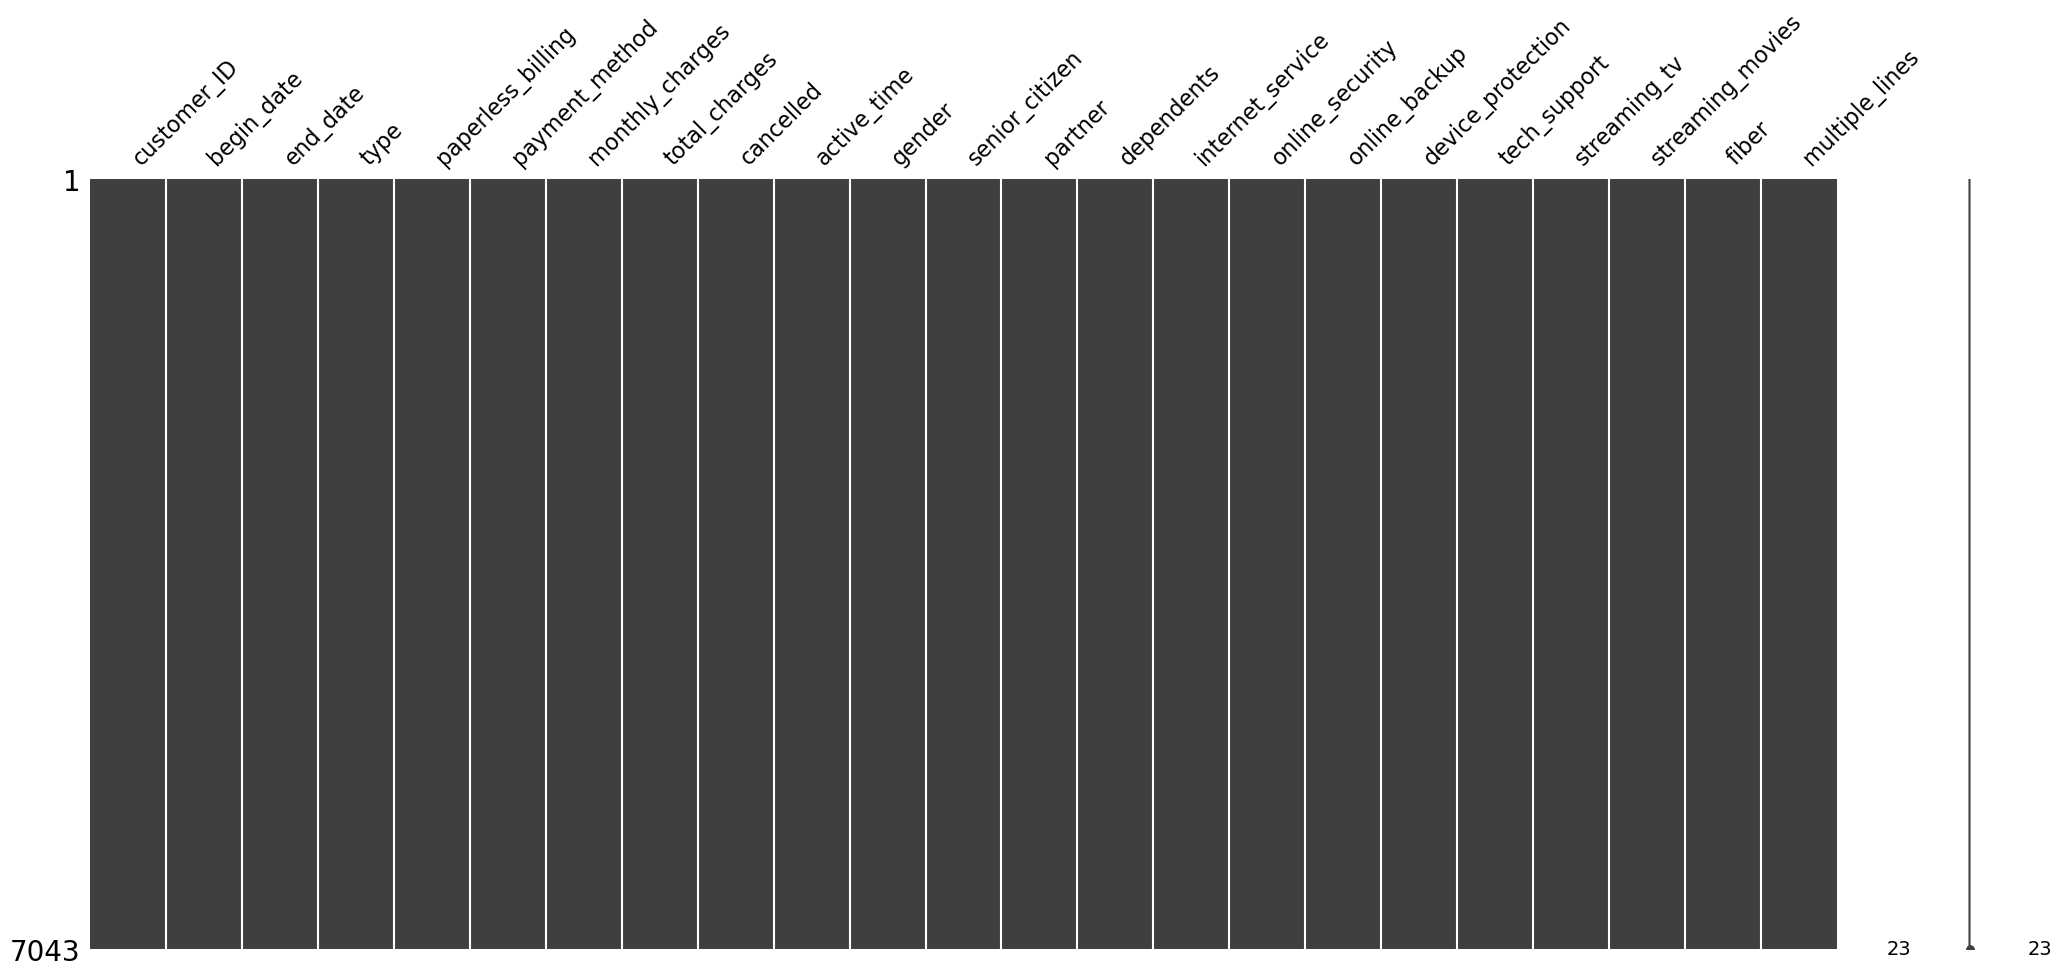

In [25]:
msno.matrix(df)

Our data does not contain null values

### EDA

The company's goal is to better understand cancellation rate, we will focus in providing useful insigth in that particular area

We will analize each dimension in our dataset. The total income is calculated as:

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Income generated by active and cancelled contracts

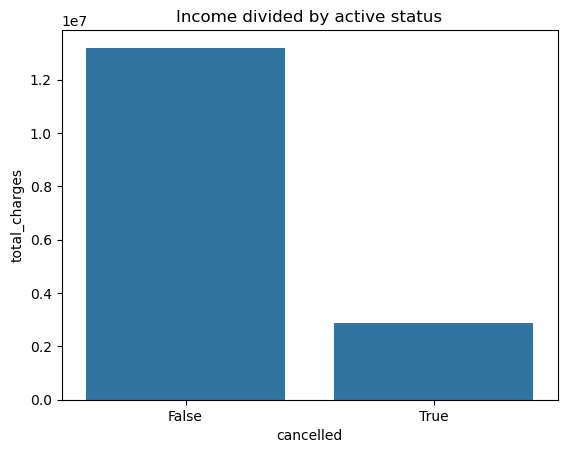

In [27]:
g = sns.barplot(df.groupby('cancelled')['total_charges'].sum()).set_title('Income divided by active status')

Based on the plot, we see that customer that cancelled their contracts generated more than $2.000.000 

Text(0.5, 1.0, 'Income by active status amoung different types of contracts')

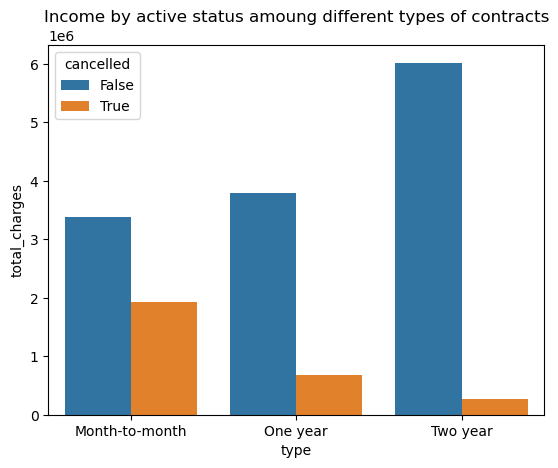

In [28]:
sns.barplot(
        df, 
        x='type', 
        y='total_charges', 
        hue='cancelled', 
        estimator='sum', 
        errorbar=None).set_title('Income by active status amoung different types of contracts')

Based on the plot above, cancelled contracts that were in a month-to-month basis, generated more revenue than other types of cancelled contracts. In the other hand, cancelled contracts in a two-year commitment generated the minimun income overall. 
The opposite is valid for active contracts: two-year contracts bring more total income than other types of contracts 

Text(0.5, 1.0, 'Proportion of types of contracts based on active and cancelled contracts')

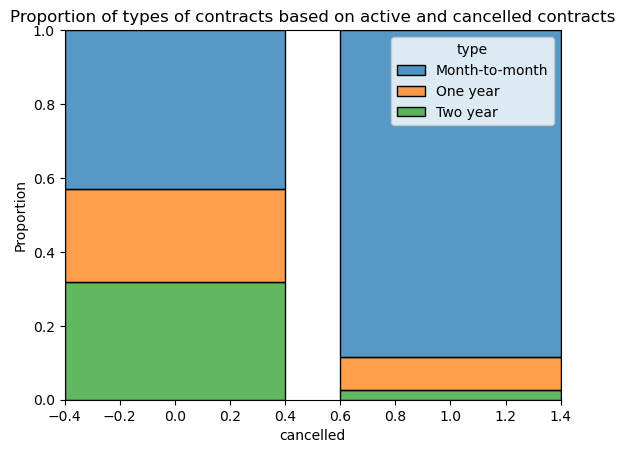

In [29]:
sns.histplot(
    data=df,
    x="cancelled", hue="type",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
).set_title('Proportion of types of contracts based on active and cancelled contracts')

Based on the plot above, tha majority of cancelled contracts were in a month-to-month basis, followed by one-year contracts and lastly two-year-contracts.
In the case of active contracts, the majority of them are set on a monthly basis, followed by two-years basis and lastle one year-basis

From the set of plots above we can finally conclude. In the case of cancelled contracts, there is a positive correlation between the amount of contracts in any given type of commitment and the generated revenue. For active contracts the correlation seems to be present between duration of contract and income.

#### Internet services and contract cancellation

In [30]:
df_internet_services = pd.DataFrame()
df_internet_services['internet_services'] = df[internet_cols].sum(axis=1)
df_internet_services = pd.concat( [df_internet_services, df[['cancelled', 'total_charges', 'monthly_charges']].astype('int')], axis=1)

Text(0.5, 1.0, 'Amount of cancelled services by amount of adquired internet services ')

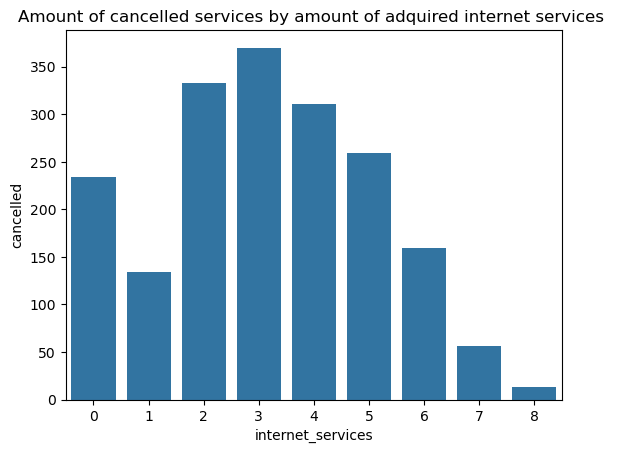

In [31]:
sns.barplot(df_internet_services.groupby('internet_services')['cancelled'].sum()) .set_title('Amount of cancelled services by amount of adquired internet services ')


Text(0.5, 1.0, 'Income by amount of cancelled internet services')

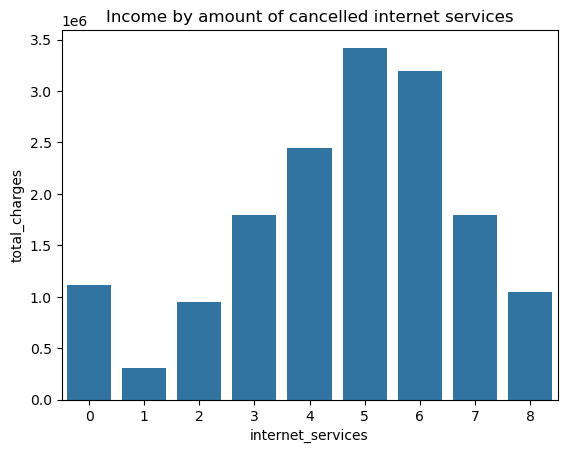

In [32]:
sns.barplot(df_internet_services.groupby('internet_services')['total_charges'].sum()).set_title('Income by amount of cancelled internet services')

Text(0.5, 1.0, 'Average amount charged by amount of internet services')

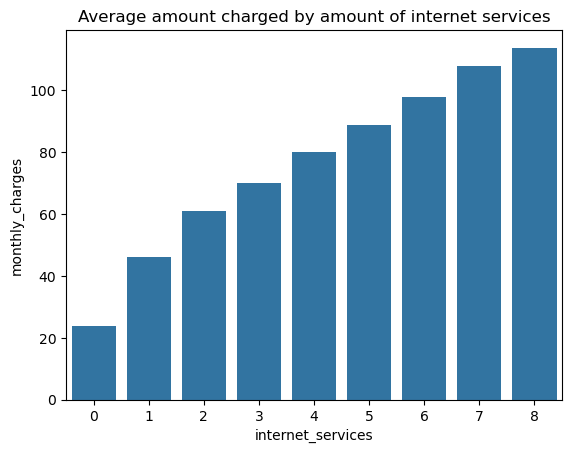

In [33]:
g = sns.barplot(df_internet_services.groupby('internet_services')['monthly_charges'].mean())
g.set_title('Average amount charged by amount of internet services')

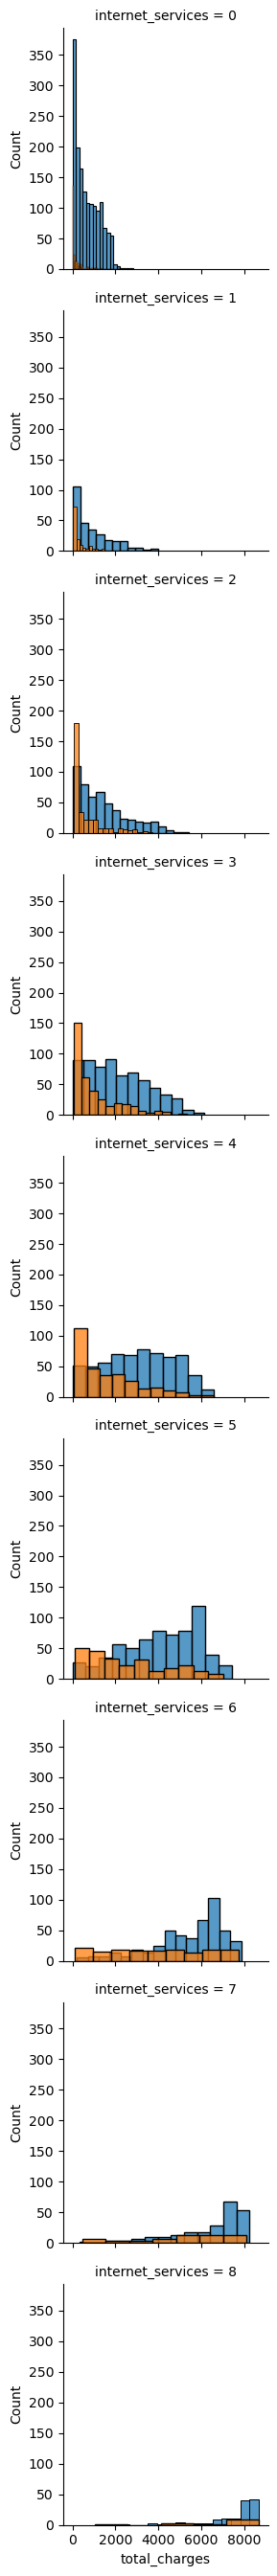

In [34]:
g = sns.FacetGrid(
        df_internet_services.reset_index(),
        hue='cancelled', 
        row='internet_services')
g.map(sns.histplot, 'total_charges')

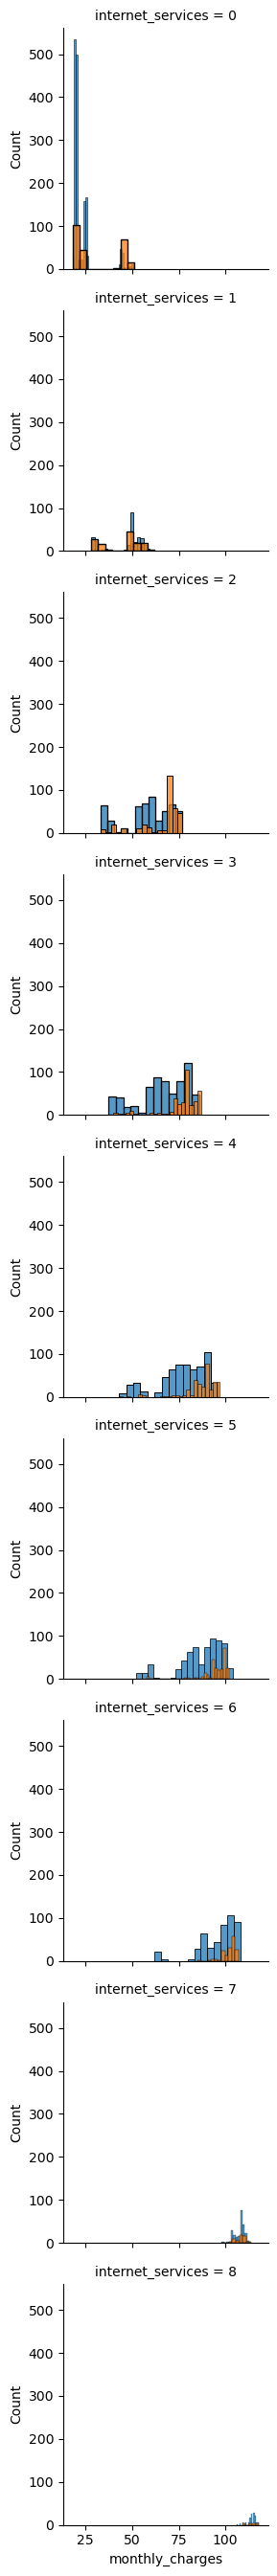

In [35]:
g = sns.FacetGrid(df_internet_services.reset_index(),hue='cancelled', row='internet_services')
g.map(sns.histplot, 'monthly_charges')

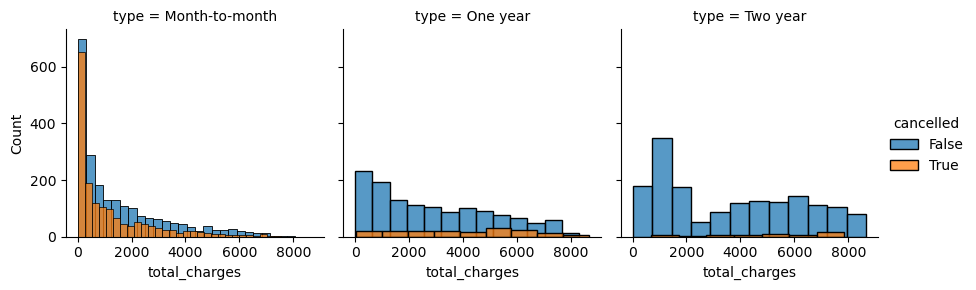

In [36]:
g = sns.FacetGrid(df, col='type',hue='cancelled')
g.map(sns.histplot, 'total_charges')
g.add_legend()

From the plot above, we analyze the total charges for each type of contract. In this case we found that month-to-month contract are the most commun type of contract. Total charges do not go above $8000 

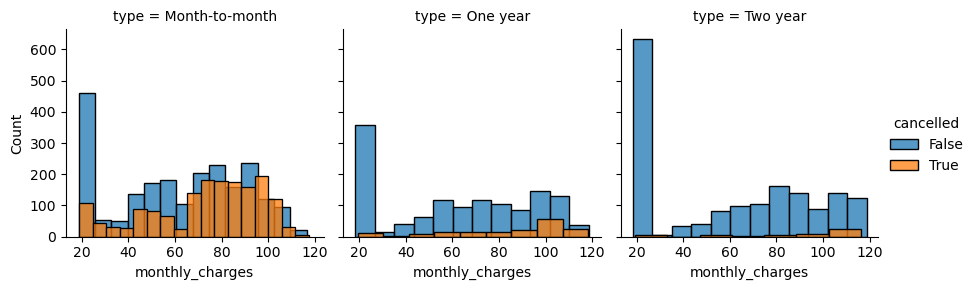

In [37]:
g = sns.FacetGrid(df, col="type", hue='cancelled')
g.map(sns.histplot, "monthly_charges")
g.add_legend()

In the plot above we analyzed histograms of monthly charges by type of contract. On this case: the majority of monthly charges are between $20-$30 and for customers that cancelled their contract this value goes up ranging values from $70-$100

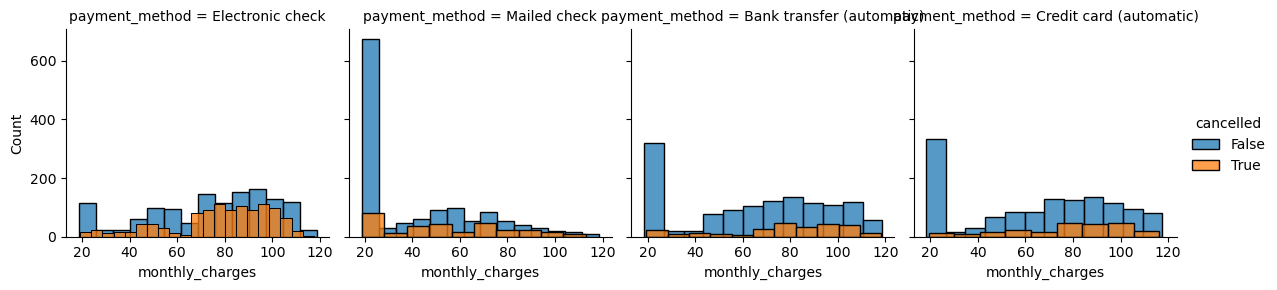

In [38]:
g = sns.FacetGrid(df, hue='cancelled', col='payment_method')
g.map(sns.histplot, 'monthly_charges')
g.add_legend()

#### Revenue

Now let's continue analyzing time series for cancelled contracts

In [39]:
df_series = df.query('cancelled==True').set_index('end_date')
df_series = df_series.sort_index()

In [40]:
internet_services_series = df_series.resample('D')[internet_cols].sum()


In [41]:
internet_services_series = internet_services_series.reset_index()


In [42]:
internet_services_series = pd.melt(internet_services_series,
        id_vars=['end_date'],
        value_vars=internet_cols,
        var_name='internet_products',
        value_name='count' )

(array([18170., 18184., 18201., 18215., 18231., 18245., 18262.]),
 [Text(18170.0, 0, '2019-10-01'),
  Text(18184.0, 0, '2019-10-15'),
  Text(18201.0, 0, '2019-11-01'),
  Text(18215.0, 0, '2019-11-15'),
  Text(18231.0, 0, '2019-12-01'),
  Text(18245.0, 0, '2019-12-15'),
  Text(18262.0, 0, '2020-01-01')])

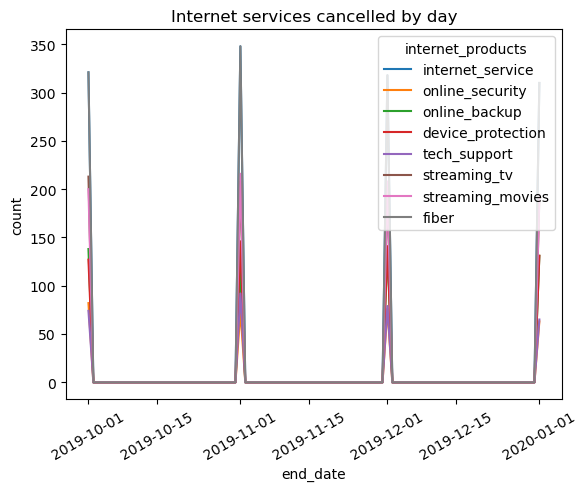

In [43]:
sns.lineplot(data=internet_services_series, x='end_date', y='count', hue='internet_products').set_title('Internet services cancelled by day')
plt.xticks(rotation=30)
# TODO: PLot on  FAcetGRid dividded by internet product

2019-11-02 is the day with the biggest amount of cancellations. The cancellations happen every month.

In [44]:
contract_series = df_series.groupby(['end_date', 'type'])['total_charges'].count()

(array([18170., 18184., 18201., 18215., 18231., 18245., 18262.]),
 [Text(18170.0, 0, '2019-10-01'),
  Text(18184.0, 0, '2019-10-15'),
  Text(18201.0, 0, '2019-11-01'),
  Text(18215.0, 0, '2019-11-15'),
  Text(18231.0, 0, '2019-12-01'),
  Text(18245.0, 0, '2019-12-15'),
  Text(18262.0, 0, '2020-01-01')])

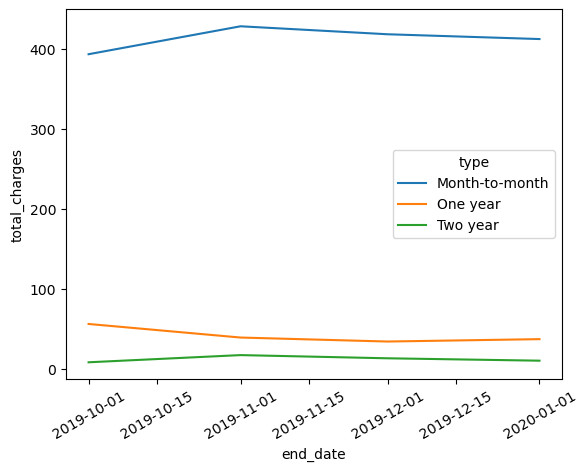

In [45]:
sns.lineplot(data=contract_series.reset_index(), hue='type', x='end_date', y='total_charges')
plt.xticks(rotation=30)

The plot above presents how contracts were cancelled in terms of type of contract among the time axis. Month to month contracts are more likely to be cancelled. One year cancelled contracts have had a sligthly reduction and now its trend is almost flat.

Now let's analyze contract tenure

In [46]:
active_time_summary = df.query('cancelled==True').groupby('active_time')['customer_ID'].count()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(2

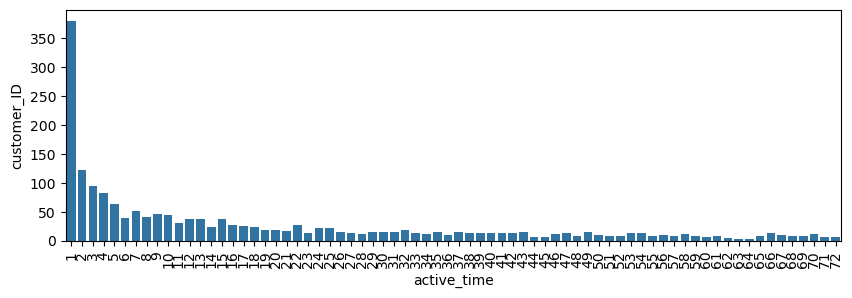

In [47]:
plt.figure(figsize=(10, 3))
sns.barplot(data=active_time_summary)
plt.xticks(rotation=90)

Most of users cancel their contracts on the first months.

## Cancelation rate

Now let's identify what the cancelation rate is.

In [48]:
cancelation_rate = (df['cancelled']==True).sum()/len(df['cancelled'])

#TODO: Calculate cancelation rate by days

In [49]:
cancelation_rate*100

26.536987079369588

The actual cancellation rate is 26.5% (We assume our data contains all the data of contracts and is not jsut a sample)

## Model building

In this case we are facing a binary classification problem, our target is the `cancelled` column. In addition, for the EDA stage we have used not normalized data also we included extra columns to better understand our business rules

Based on common sense it is worth to say that customer satisfaction, competitors' prices, technology development and other factors as contract duration are relevant in predicting if whether or not a customer will finalize their contract. Unfortunetly that data is not provided and our analysis will only include basic characteristics.  

#### Our target.
As we face a binary classification task we need to ensure our classification classes are properly balanced.

<Axes: xlabel='cancelled', ylabel='customer_ID'>

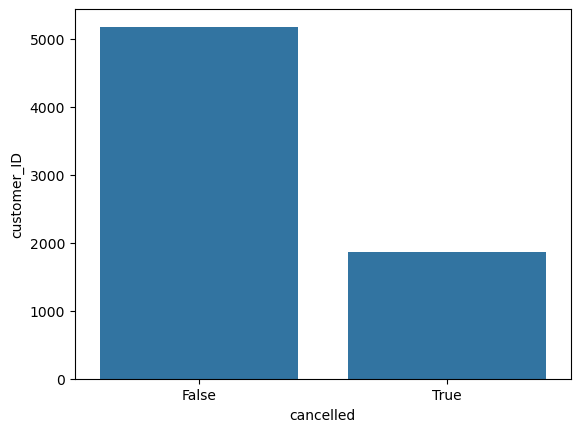

In [50]:
sns.barplot(data=df.groupby('cancelled')['customer_ID'].count())

We will need to balance our classes, but first lets convert all boolean values into integers and also by dropping unuseful columns, this will allow eliminate bias

In [51]:
bool_cols = df.select_dtypes(include='bool').columns.tolist()
df[bool_cols] = df[bool_cols].astype(int)

In [52]:
df =  df.drop(['customer_ID', 
               'end_date', 
               'begin_date', 
               'gender'], axis=1)

The following is our upsample function that will be used to class balancing step

In [53]:
from sklearn.utils import shuffle

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled



In [54]:
bool_cols = df.select_dtypes(include='bool').columns.tolist()
df[bool_cols] = df[bool_cols].astype(int)

In [55]:
corr_matrix = pd.get_dummies(df, columns=['type', 'payment_method'], drop_first=True).corr()

Text(0.5, 1.0, "Correlation with 'cancelled'")

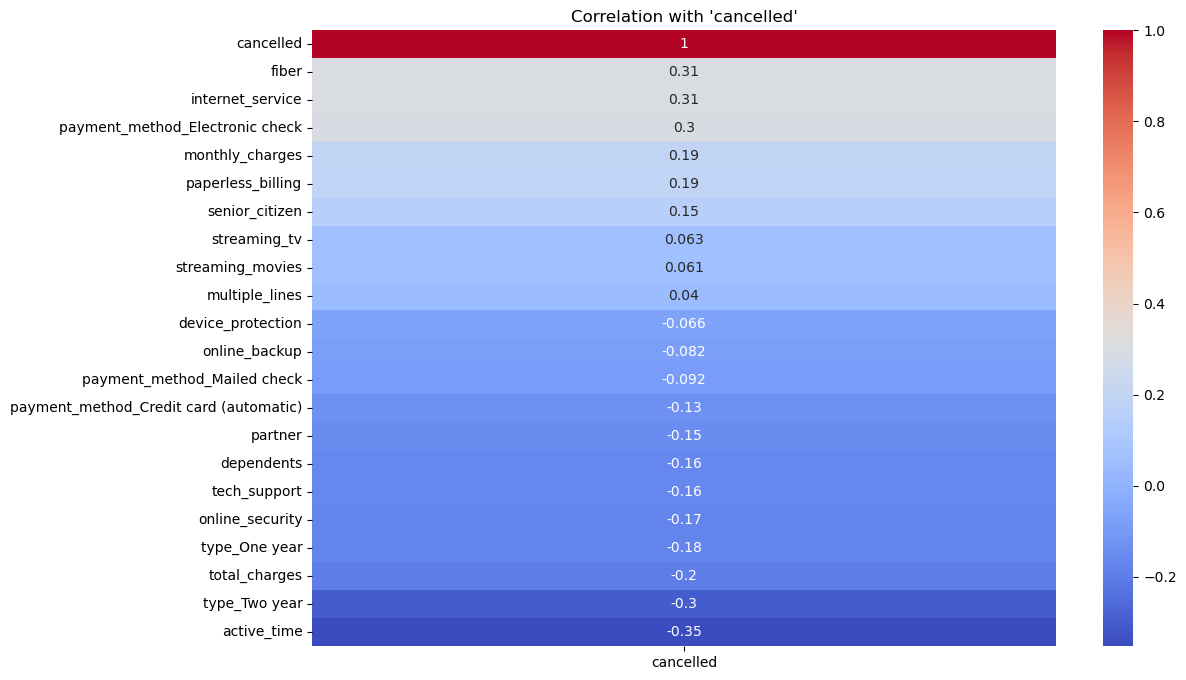

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['cancelled']].sort_values(by='cancelled', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Correlation with 'cancelled'")

#### XGBOOST model

In [57]:
from xgboost import sklearn  
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report  



model = sklearn.XGBClassifier(enable_categorical=True,use_label_encoder=False,eval_metric='logloss', random_state=42) # Or sklearn.XGBClassifier

params = {
    'estimators':range(1, 30),
    'max_depth':range(1,10),
    'learning_rate': [0.001, 0.01]
}

grid_searcher = GridSearchCV(
    estimator = model,
    param_grid= params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

X = df.drop("cancelled", axis=1)

X['type'] = X['type'].astype("category")
X['payment_method'] = X['payment_method'].astype("category")


y = df["cancelled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_train, y_train = upsample(
    X_train, y_train, 3
)


grid_searcher.fit(X_train, y_train)


c:\ProgramData\miniconda3\envs\data_science_env\lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:05] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "estimators", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=N...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'estimators': range(1, 30),
                         'learning_rate': [0.001, 0.01],
                         'max_depth': range(1, 10)},
             scoring='roc_auc')

In [58]:
grid_searcher.best_score_

0.8809633550213881

In [59]:
grid_searcher.best_params_

{'estimators': 1, 'learning_rate': 0.01, 'max_depth': 9}

#### Logistic Regression model

In [60]:
df = pd.get_dummies(df, columns=['type', 'payment_method'], drop_first=True, )

In [52]:

X = df.drop("cancelled", axis=1)  
y = df["cancelled"]

numerical_features = ['active_time', 'monthly_charges', 'total_charges'] # Or list them manually


numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])



preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
], remainder='passthrough') 


model = LogisticRegression(solver='liblinear', random_state=42) 

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)  
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_train, y_train = upsample(
    X_train, y_train, 3
)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)  
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = roc_auc_score(y_test, y_pred)
print("ROC_AUC:", accuracy)
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.77230591 0.76695652 0.74956522 0.75246377 0.75478261]
Mean CV accuracy: 0.7592148051119284
ROC_AUC: 0.7745673191383646
              precision    recall  f1-score   support

           0       0.94      0.68      0.79      1036
           1       0.49      0.87      0.63       373

    accuracy                           0.73      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.82      0.73      0.75      1409



#### Neural network model

This model will be implemented in the future

#### Business metrics

We will use the best model to identify customers and calculate how much revenue we will collect from them assuming they will stay with the company at least one month more. This feature will be implemeneted in the future